# 2018-12-23 Four Filter Analysis (With Rotation)

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from imaka.analysis import moffat as m

stats_dir = '//g/lu/data/imaka/onaga/20181223/sta/reduce/stats/'
stats_dir = '//Users/fatima/Desktop/Research/RUN9/20181223/sta/reduce/stats/'

dat_o_B = m.combine_table(stats_dir + 'stats_open_B.fits')
dat_o_V = m.combine_table(stats_dir + 'stats_open_V.fits')
dat_o_R = m.combine_table(stats_dir + 'stats_open_R.fits')
dat_o_I = m.combine_table(stats_dir + 'stats_open_I.fits')

dat_c_B = m.combine_table(stats_dir + 'stats_closed_B.fits')
dat_c_V = m.combine_table(stats_dir + 'stats_closed_V.fits')
dat_c_R = m.combine_table(stats_dir + 'stats_closed_R.fits')
dat_c_I = m.combine_table(stats_dir + 'stats_closed_I.fits')

dat_set_o = [dat_o_B, dat_o_V, dat_o_R, dat_o_I]
dat_set_c = [dat_c_B, dat_c_V, dat_c_R, dat_c_I]
wvls = [445, 551, 658, 806]

# Blue - open loop; Red - closed loop (first and third plot)
# Circles - Minor FWHM; Squares - Major FWHM (first and second plot)

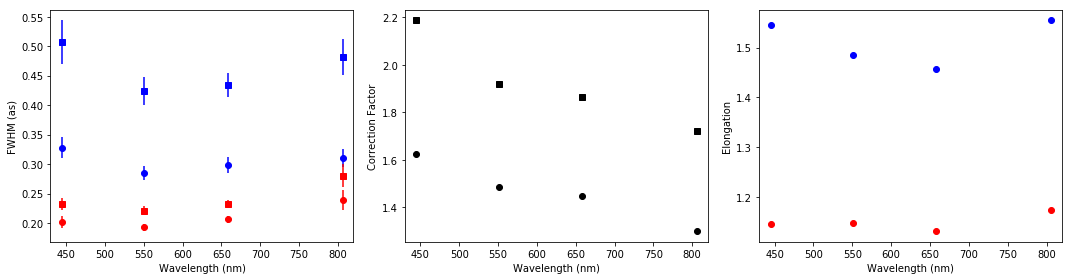

In [49]:
# All quadrants
plot_set_quad(dat_set_o,dat_set_c, quadrant=None)

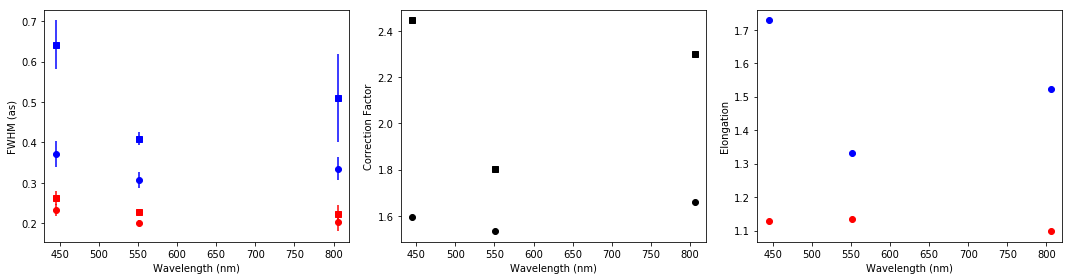

In [50]:
# NW Quadrant
plot_set_quad(dat_set_o, dat_set_c, quadrant='NW')

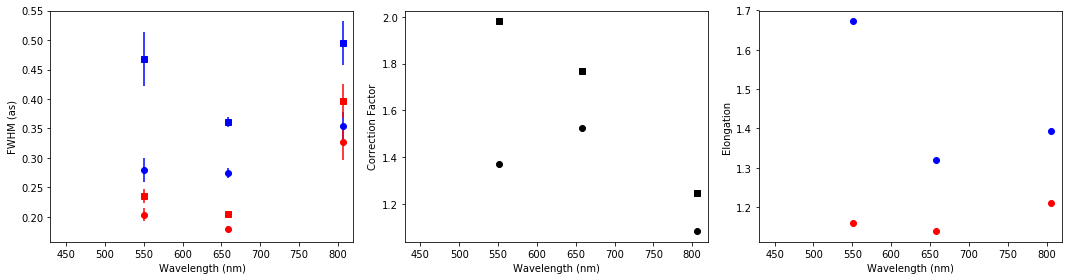

In [51]:
# NE Quadrant
plot_set_quad(dat_set_o, dat_set_c, quadrant='NE')

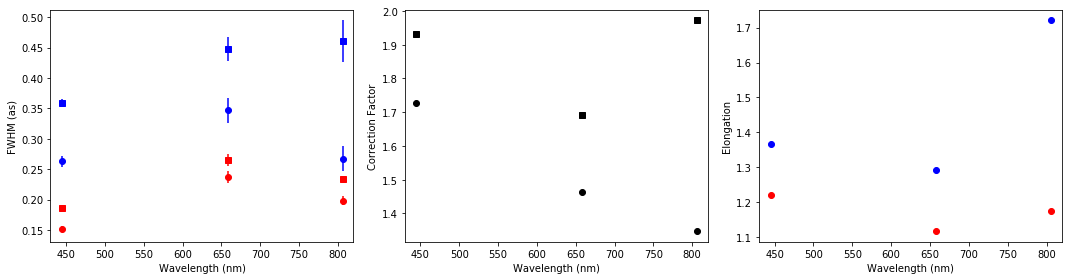

In [52]:
# SE Quadrant
plot_set_quad(dat_set_o, dat_set_c, quadrant='SE')

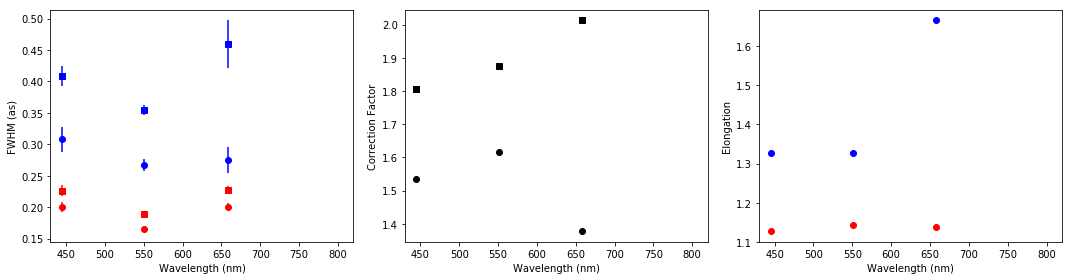

In [53]:
# SW Quadrant
plot_set_quad(dat_set_o, dat_set_c, quadrant='SW')

In [48]:
def plot_set_quad(dat_set_o, dat_set_c, quadrant=None):
    
    plt.figure(figsize=(15,4))
    for ii in range(4):

        if quadrant==None:
            dat_o = dat_set_o[ii]
            dat_c = dat_set_c[ii]
        else:
            ind_o = np.where(dat_set_o[ii]['quadrant'] == quadrant)
            ind_c = np.where(dat_set_c[ii]['quadrant'] == quadrant)
            dat_o = dat_set_o[ii][ind_o]
            dat_c = dat_set_c[ii][ind_c]

        FWHM_min_o = np.mean(dat_o['FWHM_min'])
        FWHM_min_e_o = np.std(dat_o['FWHM_min']) / np.sqrt(len(dat_o))
        FWHM_maj_o = np.mean(dat_o['FWHM_maj']) 
        FWHM_maj_e_o = np.std(dat_o['FWHM_maj']) / np.sqrt(len(dat_o))

        FWHM_min_c = np.mean(dat_c['FWHM_min']) 
        FWHM_min_e_c = np.std(dat_c['FWHM_min']) / np.sqrt(len(dat_c))
        FWHM_maj_c = np.mean(dat_c['FWHM_maj'])
        FWHM_maj_e_c = np.std(dat_c['FWHM_maj']) / np.sqrt(len(dat_c))

        FWHM_min_corr = FWHM_min_o / FWHM_min_c
        FWHM_maj_corr = FWHM_maj_o / FWHM_maj_c

        elon_o = FWHM_maj_o / FWHM_min_o
        elon_c = FWHM_maj_c / FWHM_min_c

        plt.subplot(131)
        plt.errorbar(wvls[ii], FWHM_min_o, yerr=FWHM_min_e_o, fmt='bo')
        plt.errorbar(wvls[ii], FWHM_maj_o, yerr=FWHM_maj_e_o, fmt='bs')
        plt.errorbar(wvls[ii], FWHM_min_c, yerr=FWHM_min_e_c, fmt='ro')
        plt.errorbar(wvls[ii], FWHM_maj_c, yerr=FWHM_maj_e_c, fmt='rs')
        plt.xlabel('Wavelength (nm)')
        plt.ylabel('FWHM (as)')
        plt.xlim(430, 820)

        plt.subplot(132)
        plt.plot(wvls[ii], FWHM_min_corr, 'ko')
        plt.plot(wvls[ii], FWHM_maj_corr, 'ks')
        plt.xlabel('Wavelength (nm)')
        plt.ylabel('Correction Factor')
        plt.xlim(430, 820)
        
        plt.subplot(133)
        plt.plot(wvls[ii], elon_o, 'bo')
        plt.plot(wvls[ii], elon_c, 'ro')
        plt.xlabel('Wavelength (nm)')
        plt.ylabel('Elongation')
        plt.xlim(430, 820)

    plt.tight_layout()
    
    return